# House Price Prediction

### Deskripsi Singkat

Data berisi variasi harga rumah di Australia dengan berbagai macam faktor, seperti : luas bangunan, luas basement,jumlah kamar, jumlah lantai dan lain-lain. Tujuan portofolio ini adalah (1) memprediksi harga rumah berdasarkan kemampuan model machine learning (2) mengetahui variabel yang berpengaruh dalam meningkatkan harga rumah berdasarkan metode exploratory data analysis

# 1. Import Library

In [1]:
#====== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#====== Numpy =====#
import numpy as np

#====== Visualization ====#
import matplotlib.pyplot as plt
import seaborn as sns

#====== Mengatur background agar putih terang ====#
sns.set()
%matplotlib inline

#===== Untuk Uji Statistik ======#
from scipy import stats

#===== Sklearn ========#
from sklearn.model_selection import train_test_split

# 2. Import Data

In [2]:
df = pd.read_csv('data.csv')

# 3. Data Inspection

In [3]:
#Melihat 5 baris pertama
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
#Mengetahui ada tidaknya data yang duplicate
df.duplicated().sum()

0

In [5]:
#Mengetahui unique value
for x in df.columns :
    print (f'========{x}========') 
    print (f' {df[x].unique()}') 
    print()

========date========
 ['2014-05-02 00:00:00' '2014-05-03 00:00:00' '2014-05-04 00:00:00'
 '2014-05-05 00:00:00' '2014-05-06 00:00:00' '2014-05-07 00:00:00'
 '2014-05-08 00:00:00' '2014-05-09 00:00:00' '2014-05-10 00:00:00'
 '2014-05-11 00:00:00' '2014-05-12 00:00:00' '2014-05-13 00:00:00'
 '2014-05-14 00:00:00' '2014-05-15 00:00:00' '2014-05-16 00:00:00'
 '2014-05-17 00:00:00' '2014-05-18 00:00:00' '2014-05-19 00:00:00'
 '2014-05-20 00:00:00' '2014-05-21 00:00:00' '2014-05-22 00:00:00'
 '2014-05-23 00:00:00' '2014-05-24 00:00:00' '2014-05-25 00:00:00'
 '2014-05-26 00:00:00' '2014-05-27 00:00:00' '2014-05-28 00:00:00'
 '2014-05-29 00:00:00' '2014-05-30 00:00:00' '2014-05-31 00:00:00'
 '2014-06-01 00:00:00' '2014-06-02 00:00:00' '2014-06-03 00:00:00'
 '2014-06-04 00:00:00' '2014-06-05 00:00:00' '2014-06-06 00:00:00'
 '2014-06-07 00:00:00' '2014-06-08 00:00:00' '2014-06-09 00:00:00'
 '2014-06-10 00:00:00' '2014-06-11 00:00:00' '2014-06-12 00:00:00'
 '2014-06-13 00:00:00' '2014-06-14 00:00

In [6]:
#Mengetahui info data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Summary Data - 1

Data frame :

1. tidak ada duplicate value and missing value
2. mengganti tipe kolom 'date' menjadi tipe timestamp
3. mengganti tipe data kolom 'bedrooms' menjadi tipe int
4. membuang kolom 'street' karna terlalu banyak unique value
5. membuang kolom 'statezip' karna terlalu banyak unique value
6. membuang kolom 'city' karna terlalu banyak unique value
7. membuang kolom 'country' karna hanya berisi satu data
8. mengubah nama kolom 'date' menjadi 'sold_date'

In [7]:
#mengubah 'date' menjadi tipe time --> menggunakan pd.to_datatime

df['date'] = pd.to_datetime(df['date'])

In [8]:
#mengubah 'bedrooms' menjadi obejct/int/float --> menggunakan astype

df['bedrooms'] = df['bedrooms'].astype('int64')

In [9]:
#membuang kolom statezip, street, country
#axis=1 --> kolom
#axis=0 --> baris

df=df.drop(['statezip','country','street','city'],axis=1)

In [10]:
#mengubah nama kolom
df =df.rename(columns={'date':'sold_date'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sold_date      4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 503.2 KB


#### Summary Data  - 2 

Data frame :

1. tipe data dari 'date' sudah berganti menjadi timestamp, dan nama feature menjadi 'sold_date'
2. kolom state_zip, street,city, country sudah dihapus
3. tipe data 'bedrooms' sudah menjadi tipe int

# 4. Exploratory Data Analysis

## 4.1 Data Current (Train) dan Data Future (Test)

In [12]:
#menentukan predictor dan target

#x = predictor 
#y = target (price)

#mengcopy semua data kecuali data kolom 'price' kedalam variabel x
#axis1 --> di drop berdasarkan kolom
x=df.drop('price',axis=1).copy()

#mengcopy data kolom target 'price' kedalam variabel y
y=df['price'].copy()

In [13]:
#splitting data train and testing (70%,30%) atau (80%,20%)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

#random_state untuk mengunci data agar ketika dirun berkali-kali tidak berubah

In [14]:
#memasukkan target dari y_train kedalam data x_train --> untuk mempermudah analisis
x_train['price'] = y_train

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 2194 to 860
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sold_date      3220 non-null   datetime64[ns]
 1   bedrooms       3220 non-null   int64         
 2   bathrooms      3220 non-null   float64       
 3   sqft_living    3220 non-null   int64         
 4   sqft_lot       3220 non-null   int64         
 5   floors         3220 non-null   float64       
 6   waterfront     3220 non-null   int64         
 7   view           3220 non-null   int64         
 8   condition      3220 non-null   int64         
 9   sqft_above     3220 non-null   int64         
 10  sqft_basement  3220 non-null   int64         
 11  yr_built       3220 non-null   int64         
 12  yr_renovated   3220 non-null   int64         
 13  price          3220 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 377.3 KB


#### Summary Data - 3

x_train :
1. total kolom = 14
2. total baris = 3220 (70% dari data frame)

## 4.2 Descriptive Statistic

In [16]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,3220.0,3.395652,0.909366,0.0,3.00,3.00,4.0,9.00
bathrooms,3220.0,2.153106,0.781558,0.0,1.75,2.25,2.5,6.75
sqft_living,3220.0,2138.227950,958.098193,370.0,1460.00,1990.00,2620.0,10040.00
sqft_lot,3220.0,14592.717391,35927.381691,704.0,5000.00,7680.00,11055.0,1074218.00
floors,3220.0,1.508230,0.535631,1.0,1.00,1.50,2.0,3.50
waterfront,3220.0,0.006832,0.082388,0.0,0.00,0.00,0.0,1.00
view,3220.0,0.239752,0.777701,0.0,0.00,0.00,0.0,4.00
condition,3220.0,3.457143,0.676478,1.0,3.00,3.00,4.0,5.00
sqft_above,3220.0,1819.577019,856.585738,370.0,1180.00,1580.00,2300.0,8020.00
sqft_basement,3220.0,318.650932,467.504722,0.0,0.00,0.00,620.0,4820.00


Dari tabel diatas, diketahui terdapat anomali data : <br/>
1. Min bedrooms = 0
2. Min bathrooms = 0
3. Min price = 0

#### 4.2.1 Cek Data Anomali - Bedrooms

In [17]:
#filter data == 0 

print(x_train[x_train['bedrooms']==0].shape)

#filter data == 0 (dalam persen)
#shape[0] --> index row

print((x_train[x_train['bedrooms']==0].shape[0])/(len(x_train))*100)

(1, 14)
0.031055900621118012


In [18]:
#cek data yang 0 itu seperi apa

x_train[x_train['bedrooms']==0]

,sold_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
2365,2014-06-12,0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,1095000.0


In [19]:
#karna data hanya 1 dan 0.03% --> ambil data != 0

x_train=x_train[x_train['bedrooms']>0]

#### 4.2.2 Cek Data Anomali - Bathrooms

In [20]:
#filter data == 0 

print(x_train[x_train['bathrooms']==0].shape)

#filter data == 0 (dalam persen)
#shape[0] --> index row

print((x_train[x_train['bathrooms']==0].shape[0])/(len(x_train)*100))


(0, 14)
0.0


In [21]:
#cek data yg ==0/>0 & <1 itu seperti apa

x_train[(x_train['bathrooms']>0) & (x_train['bathrooms']<1)]

,sold_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
1140,2014-05-22,1,0.75,1170,14149,1.0,0,0,5,880,290,1962,0,275000.0
3296,2014-06-25,2,0.75,1440,3700,1.0,0,0,3,1200,240,1914,1996,562100.0
2202,2014-06-10,2,0.75,1392,43710,1.5,0,0,4,1392,0,1978,2000,350000.0
3168,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,402101.0
1219,2014-05-23,1,0.75,430,5050,1.0,0,0,2,430,0,1912,0,80000.0
4184,2014-07-09,3,0.75,490,38500,1.5,0,0,4,490,0,1959,0,150000.0
3778,2014-07-01,1,0.75,370,1801,1.0,0,0,5,370,0,1923,0,276000.0
1086,2014-05-21,2,0.75,850,7710,1.0,0,2,5,550,300,1909,1988,360000.0
3945,2014-07-03,2,0.75,660,5240,1.0,0,0,4,660,0,1912,1989,100000.0
3584,2014-06-27,2,0.75,840,40642,1.0,1,4,4,840,0,1937,0,528000.0


Data tidak dihapus --> karna ada kamar mandi dengan ukuran 0.75sqft

#### 4.2.3 Cek Data Anomali - Price

In [22]:
#filter data == 0 

print(x_train[x_train['price']==0].shape)

#filter data == 0 (dalam persen)
#shape[0] --> index row

print((x_train[x_train['price']==0].shape[0])/(len(x_train)*100))


(35, 14)
0.00010872941907424665


In [23]:
#karna target adalah harga rumah, maka harus memiliki nilai
#filter --> ambil data != 0

x_train=x_train[x_train['price']>0]

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3184 entries, 2194 to 860
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sold_date      3184 non-null   datetime64[ns]
 1   bedrooms       3184 non-null   int64         
 2   bathrooms      3184 non-null   float64       
 3   sqft_living    3184 non-null   int64         
 4   sqft_lot       3184 non-null   int64         
 5   floors         3184 non-null   float64       
 6   waterfront     3184 non-null   int64         
 7   view           3184 non-null   int64         
 8   condition      3184 non-null   int64         
 9   sqft_above     3184 non-null   int64         
 10  sqft_basement  3184 non-null   int64         
 11  yr_built       3184 non-null   int64         
 12  yr_renovated   3184 non-null   int64         
 13  price          3184 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 373.1 KB


#### Summary Data - 4

x_train :

1.total kolom = 15 <br/>
2.total baris = 3184 (70% dari data frame)

## 4.3 Analisa Univariate - Target

In [25]:
#cek sweness dari target
price_skew = round(x_train['price'].skew(),2)
price_skew

4.42

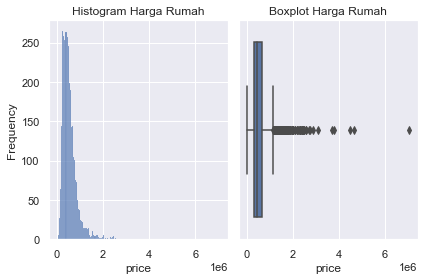

In [26]:
#membuat histogram 
plt.subplot(121)
sns.histplot(data=x_train,x='price')
plt.title(f'Histogram Harga Rumah',fontsize=12) 
plt.ylabel('Frequency')

#membuat boxplot
plt.subplot(122)
sns.boxplot(data=x_train,x='price')
plt.title(f'Boxplot Harga Rumah',fontsize=12)

#memberi jarak antara layout
plt.tight_layout()
plt.show()

Target atau harga rumah memiliki distribusi persebaran skew positif dengan nilai skew sebesar 4.28. Selain itu, data harga rumah memiliki banyak outlier, sehingga untuk analisa akan menggunakan median sebagai centre of tendency

## 4.4 Analisa Bivariate & Multivariate

## 4.4.1 Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

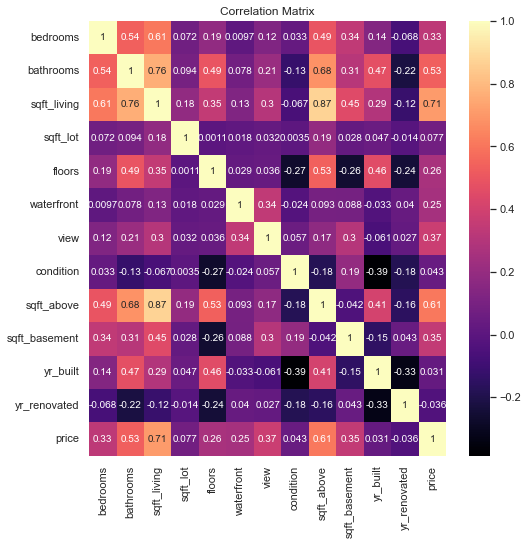

In [27]:
#membuat correlation matrix

plt.figure(figsize=(8,8))
sns.heatmap(x_train.corr(), annot = True,
           fmt='.2g', cmap='magma')
plt.title('Correlation Matrix',fontsize = 12)

Dari correlation matrix, dapat diketahui bahwa beberapa predictor memiliki korelasi positif dengan target. Berikut list predictor yang memiliki korelasi dengan target (urutan dari kuat-sedang) :
1. sqft_living
2. sqft_above
3. bathrooms
4. view
5. sqft_basement
6. bedrooms
7. floor
8. waterfront

## 4.4.2 Analisa Faktor Internal 

Dari analisa correlation matrix, diketahui bahwa faktor internal seperti luas bangunan, jumlah kamar, jumlah lantai berpengaruh pada harga rumah. Berikut urutan prediktor yang berpengaruh pada harga (urutan dimulai dari yang memiliki korelasi tinggi ke rendah) : <br/>
1. Sqft_living
2. Bathrooms
3. Sqft_bassement <br/>
4. Bedrooms
5. Floors

note : tidak membahas 'sqft_above' karna multicolinearity dengan 'sqft_living'

### 4.4.2.1 Luas Bangunan

Text(0.5, 1.0, 'Luas Bangunan vs Harga Rumah')

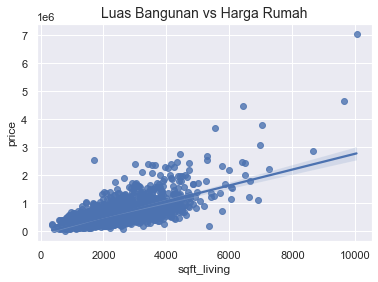

In [28]:
#melihat hubungan sqft_living dengan price

sns.regplot(data=x_train, x='sqft_living', y='price')
plt.title('Luas Bangunan vs Harga Rumah', fontsize=14)

Dari regresi plot diagram hubungan luas bangunan dan harga rumah, dapat disimpulkan bahwa semakin besar luas bangunan semakin mahal harga rumah

### 4.4.2.2 Luas Kamar Mandi

Text(0.5, 1.0, 'Luas Kamar Mandi vs Harga')

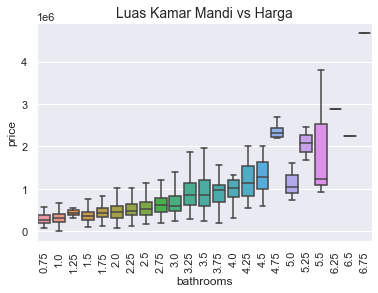

In [29]:
#melihat hubungan bathrooms dan harga

sns.boxplot(data=x_train,x='bathrooms',y='price',showfliers=False)
plt.xticks(rotation=90);
plt.title('Luas Kamar Mandi vs Harga',fontsize=14)

In [30]:
#filter data kurang dari 6

x_train = x_train[x_train['bathrooms']<6]

Text(0.5, 1.0, 'Luas Kamar Mandi vs Harga')

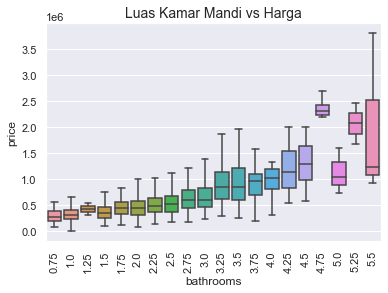

In [31]:
sns.boxplot(data=x_train,x='bathrooms',y='price',showfliers=False)
plt.xticks(rotation=90);
plt.title('Luas Kamar Mandi vs Harga', fontsize=14)

Dari boxplot diatas, dapat diketahui bahwa luas kamar mandi berpengaruh pada harga. Harga akan meningkat seiring bertambahnya luas kamar mandi. Tetapi ketika luas kamar mandi lebih dari 4.75 harga cenderung menurun. Dengan demikian, dapat disimpulkan bahwa ukuran optimal dari luas kamar mandi adalah 4.75 sqft

### 4.4.2.3 Luas Basement

Text(0.5, 1.0, 'Luas Basement vs Harga Rumah')

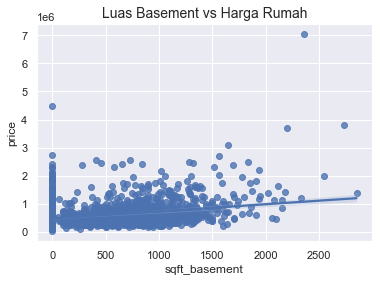

In [32]:
#melihat hubungan sqft_basement dan price

sns.regplot(data=x_train, x='sqft_basement',y='price')
plt.title('Luas Basement vs Harga Rumah', fontsize=14)

Dari regresi plot diagram, dapat disimpulkan bahwa luas basement berpengaruh terhadap harga rumah. Namun pengaruhnya tidak signifikan. Untuk itu perlu membuat feature baru, dengan tujuan mengetahui pengaruh ada tidaknya basement terhadap harga rumah

#### Membuat Feature Baru

In [33]:
#Feature
x_train['is_basement']=x_train['sqft_basement'].apply(lambda x :1 if x>0 else 0)

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 2194 to 860
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sold_date      3181 non-null   datetime64[ns]
 1   bedrooms       3181 non-null   int64         
 2   bathrooms      3181 non-null   float64       
 3   sqft_living    3181 non-null   int64         
 4   sqft_lot       3181 non-null   int64         
 5   floors         3181 non-null   float64       
 6   waterfront     3181 non-null   int64         
 7   view           3181 non-null   int64         
 8   condition      3181 non-null   int64         
 9   sqft_above     3181 non-null   int64         
 10  sqft_basement  3181 non-null   int64         
 11  yr_built       3181 non-null   int64         
 12  yr_renovated   3181 non-null   int64         
 13  price          3181 non-null   float64       
 14  is_basement    3181 non-null   int64         
dtypes: datetime64[ns](1

#### Summary Data - 5
x_train
1. Terdapat 1 feature baru = is_basement 

Text(0.5, 1.0, 'Ada/Tidaknya Basement vs Harga')

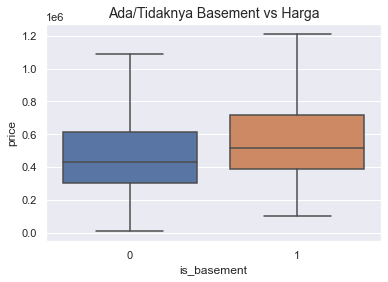

In [35]:
#melihat hubungan is_basement dan price

sns.boxplot(data=x_train,x='is_basement',y='price',showfliers=False)
plt.title('Ada/Tidaknya Basement vs Harga', fontsize=14)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


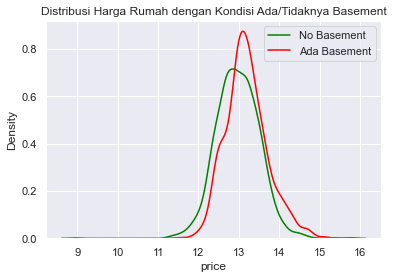

In [36]:
#membuat density plot untuk mengetahui distribusi harga dengan variabel ada/tidaknya basement
#melakukan transformasi agar menjadi distribusi normal

sns.distplot(np.log1p(x_train[x_train['is_basement']==0]['price']),color='green',hist=False,label='No Basement')
sns.distplot(np.log1p(x_train[x_train['is_basement']==1]['price']),color='red',hist=False,label='Ada Basement')
plt.title('Distribusi Harga Rumah dengan Kondisi Ada/Tidaknya Basement',fontsize=12)
plt.legend()

Dari boxplot dan displot hubungan Ada/Tidaknya Basement dan Harga Rumah, dapat diketahui bahwa harga rumah dengan basement akan lebih tinggi dari pada yang tidak memiliki basement

In [37]:
#menguji secara statistik
#melakukan transformasi agar menjadi distribusi 

price_basement = np.log1p(x_train[x_train['is_basement']==1]['price'])
price_no_basement = np.log1p(x_train[x_train['is_basement']==0]['price'])

alpha = 0.05
t_value1,p_value1 = stats.ttest_ind(price_no_basement,price_basement)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah yang memiliki basement dan tidak')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah yang memiliki basement dan tidak')

Kesimpulan : nilai p_value 4.887703175350493e-29 kurang dari alpha 0.05
Ada perbedaan yang signifikan dari segi harga antara rumah yang memiliki basement dan tidak


### 4.4.2.4 Jumlah Kamar

Text(0.5, 1.0, 'Jumlah Kamar vs Harga')

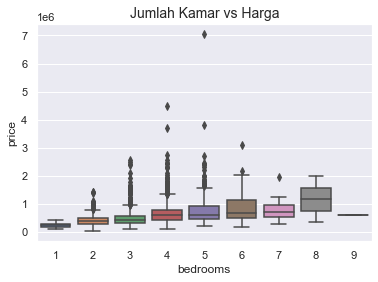

In [38]:
#mengetahui hubungan jumlah kamar terhadap harga rumah

sns.boxplot(data=x_train,x='bedrooms',y='price')
plt.title('Jumlah Kamar vs Harga',fontsize=14)

In [39]:
x_train[x_train['bedrooms']==9]

,sold_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price,is_basement
241,2014-05-07,9,4.5,3830,6988,2.5,0,0,3,2450,1380,1938,2003,599999.0,1


In [40]:
#filer data selain 9

x_train= x_train[x_train['bedrooms']<9]

Text(0.5, 1.0, 'Jumlah Kamar vs Harga')

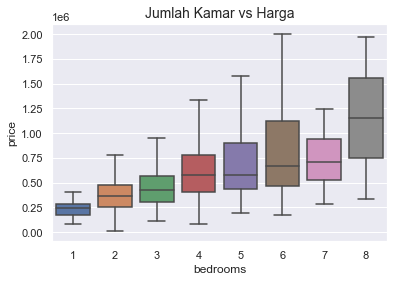

In [41]:
sns.boxplot(data=x_train,x='bedrooms',y='price',showfliers=False)
plt.title('Jumlah Kamar vs Harga',fontsize=14)

Text(0.5, 1.0, 'Jumlah Kamar vs Luas Bangunan')

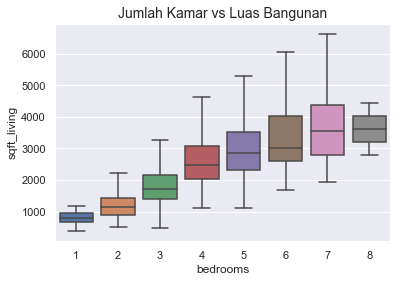

In [42]:
sns.boxplot(data=x_train,x='bedrooms',y='sqft_living',showfliers=False)
plt.title('Jumlah Kamar vs Luas Bangunan',fontsize=14)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


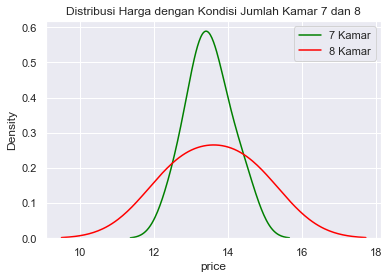

In [43]:
#mengetahui hubungan distribusi harga dengan jumlah kamar 7 dan 8
#melakukan transformasi agar menjadi distribusi normal

sns.distplot(np.log1p(x_train[x_train['bedrooms']==7]['price']),color='green',hist=False,label='7 Kamar')
sns.distplot(np.log1p(x_train[x_train['bedrooms']==8]['price']),color='red',hist=False,label='8 Kamar')
plt.title('Distribusi Harga dengan Kondisi Jumlah Kamar 7 dan 8',fontsize=12)
plt.legend()


In [44]:
#menguji secara statistik
#melakukan transformasi agar menjadi distribusi normal

price_8 = np.log1p(x_train[x_train['bedrooms']==8]['price'])
price_7 = np.log1p(x_train[x_train['bedrooms']==7]['price'])

alpha = 0.05
t_value1,p_value1 = stats.f_oneway(price_7,price_8)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8')

Kesimpulan : nilai p_value 0.8279905986942825 lebih dari alpha 0.05
Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


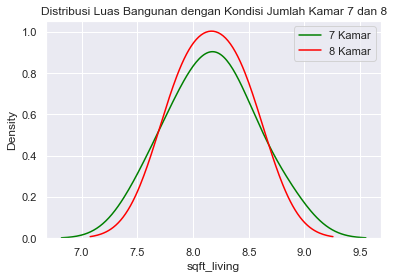

In [45]:
#mengetahui hubungan distribusi luas bangunan dengan jumlah kamar 7 dan 8
#melakukan transformasi agar menjadi distribusi normal

sns.distplot(np.log1p(x_train[x_train['bedrooms']==7]['sqft_living']),color='green',hist=False,label='7 Kamar')
sns.distplot(np.log1p(x_train[x_train['bedrooms']==8]['sqft_living']),color='red',hist=False,label='8 Kamar')
plt.title('Distribusi Luas Bangunan dengan Kondisi Jumlah Kamar 7 dan 8',fontsize=12)
plt.legend()

In [46]:
#menguji secara statistik
##melakukan transformasi agar menjadi distribusi normal

luasbangunan_8 = np.log1p(x_train[x_train['bedrooms']==8]['sqft_living'])
luasbangunan_7 = np.log1p(x_train[x_train['bedrooms']==7]['sqft_living'])

alpha = 0.05
t_value1,p_value1 = stats.ttest_ind(luasbangunan_7,luasbangunan_8)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi luas bangunan antara rumah dengan jumlah kamar 7 dan 8')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi luas bangunan antara rumah dengan jumlah kamar 7 dan 8')

Kesimpulan : nilai p_value 0.9946527798842163 lebih dari alpha 0.05
Tidak ada perbedaan yang signifikan dari segi luas bangunan antara rumah dengan jumlah kamar 7 dan 8


Jumlah kamar berpengaruh terhadap harga rumah hal ini didukung dengan :
<br/>
1. Boxplot Hubungan Jumlah Kamar dan Harga Rumah, trend harga meningkat seiring dengan bertambahnya jumlah kamar
2. Boxplot Hubungan Jumlah Kamar dan Luas Bangunan, dimana semakin banyak jumlah kamar semakin besar luas bangunan rumah<br/>
<br/>
Ketika dianalisa lebih lanjut menggunakan uji statistik, ternyata jumlah kamar paling optimal adalah 7

### 4.4.2.5 Jumlah Lantai

Text(0.5, 1.0, 'Jumlah Lantai vs Harga')

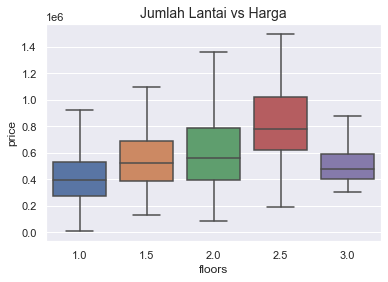

In [47]:
#mengetahui hubungan jumlah lantai dengan harga rumah

sns.boxplot(data=x_train,x='floors',y='price',showfliers=False)
plt.title('Jumlah Lantai vs Harga',fontsize=14)

In [48]:
#hubungan jumlah lantai, luas bangunan, dan harga

pd.pivot_table(x_train,index='sqft_living',columns='floors',values='price',aggfunc='median').dropna()
pivot_floor = round(pd.pivot_table(x_train,index='sqft_living',columns='floors',values='price',aggfunc='median').dropna(),2)
pivot_floor

floors,1.0,1.5,2.0,2.5,3.0
sqft_living,,,,,
1480,360750.0,449250.0,458400.00,620000.0,420000.00
1620,459000.0,305875.0,386000.00,415000.0,505138.89
1750,325000.0,605000.0,415500.00,626000.0,525000.00
1980,432500.0,660000.0,342246.43,744000.0,547500.00


Dari data diatas, dapat disimpulkan bahwa harga rumah paling tinggi saat jumlah lantai adalah 2.5. Hal ini didukung dengan :<br/>
<br/>
1. Boxplot hubungan Jumlah Lantai dengan Harga, harga rumah meningkat sampai pada kondisi rumah dengan 2.5 lantai. <br/>
   diatas 2.5 harga rumah mengalami penurunan<br/>
2. Ketika kita membandingkan jumlah lantai pada luas bangunan yang sama, dapat diketahui bahwa harga rumah cenderung <br/>
   paling mahal saat rumah memiliki 2.5 lantai <br/>
<br/>

### Wrap Up - Kesimpulan Faktor Internal

Faktor-faktor yang dapat meningkatkan harga rumah :

1. Luas bangunan sebanding dengan peningkatan harga rumah
2. Rumah ada basement akan memiliki harga rumah yang lebih tinggi daripada yang tidak memiliki basement
3. Luas kamar mandi yang optimal adalah 4.75 sqft 
4. Jumlah kamar paling optimal adalah 7
5. Jumlah lantai paling optimal adalah 2.5

## 4.4.3 Analisa Pengaruh External

### 4.4.3.1 Lokasi Rumah (Dekat dengan Pantai/Sungai/Danau)

Text(0.5, 1.0, 'Waterfront vs Harga')

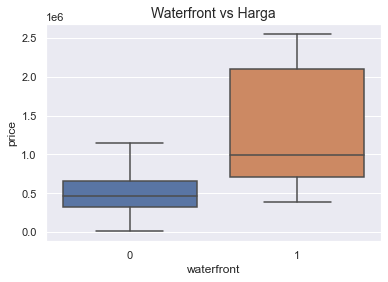

In [49]:
#mengetahui pengaruh waterfront dengan price
sns.boxplot(data=x_train,x='waterfront',y='price',showfliers=False)
plt.title('Waterfront vs Harga',fontsize=14)

Text(0.5, 1.0, 'Waterfront & Luas Bangunan vs Harga')

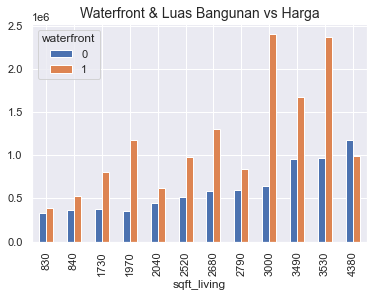

In [50]:
#mengetahui pengaruh waterfront dengan price dan sqft_living
pd.pivot_table(x_train,index='sqft_living',columns='waterfront',values='price',aggfunc='median').dropna().plot(kind='bar')
plt.title('Waterfront & Luas Bangunan vs Harga',fontsize=14)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


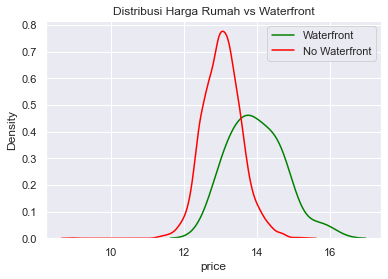

In [51]:
#mengetahui hubungan distribusi harga rumah dengan lokasi rumah
#melakukan transformasi agar menjadi distribusi normal

sns.distplot(np.log1p(x_train[x_train['waterfront']==1]['price']),color='green',hist=False,label='Waterfront')
sns.distplot(np.log1p(x_train[x_train['waterfront']==0]['price']),color='red',hist=False,label='No Waterfront')
plt.title('Distribusi Harga Rumah vs Waterfront',fontsize=12)
plt.legend()


In [52]:
#menguji secara statistik
#melakukan transformasi agar menjadi distribusi normal

price_with = np.log1p(x_train[x_train['waterfront']==1]['price'])
price_without = np.log1p(x_train[x_train['waterfront']==0]['price'])

alpha = 0.05
t_value1,p_value1 = stats.ttest_ind(price_without,price_with)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai/danau/sungai dan tidak')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai.danau/sungai dan tidak')

Kesimpulan : nilai p_value 6.323869118938553e-14 kurang dari alpha 0.05
Ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai/danau/sungai dan tidak


Dari hasil uji statistik dan boxplot, dapat diketahui bahwa lokasi rumah yang dekat dengan pantai/danau/sungai memiliki harga yang lebih tinggi daripada yang tidak. Lalu jika kita bandingkan rumah dengan luas bangunan yang sama, harga rumah tetap lebih tinggi jika dekat dengan pantai/danau/sungai, tetapi harga rumah cenderung fluktuatif

### 4.4.3.2 View

Text(0.5, 1.0, 'View vs Harga')

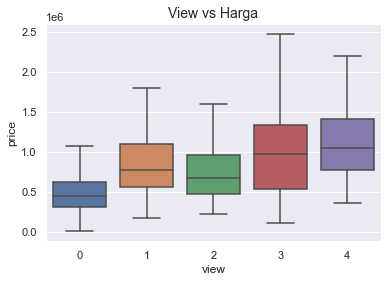

In [53]:
#mengetahui pengaruh view dengan price
sns.boxplot(data=x_train,x='view',y='price',showfliers=False)
plt.title('View vs Harga',fontsize=14)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

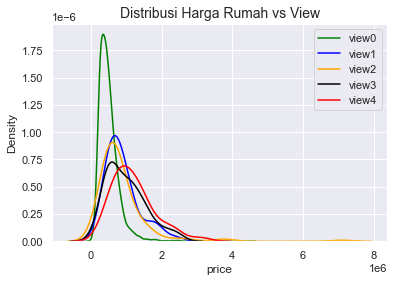

In [54]:
#mengetahui hubungan distribusi harga rumah dengan view
sns.distplot(x_train[x_train['view']==0]['price'],color='green',hist=False,label='view0')
sns.distplot(x_train[x_train['view']==1]['price'],color='blue',hist=False,label='view1')
sns.distplot(x_train[x_train['view']==2]['price'],color='orange',hist=False,label='view2')
sns.distplot(x_train[x_train['view']==3]['price'],color='black',hist=False,label='view3')
sns.distplot(x_train[x_train['view']==4]['price'],color='red',hist=False,label='view4')
plt.title('Distribusi Harga Rumah vs View',fontsize=14)
plt.legend()


In [55]:
#menguji secara statistik
price_view0 = x_train[x_train['view']==0]['price']
price_view1 = x_train[x_train['view']==1]['price']
price_view2 = x_train[x_train['view']==2]['price']
price_view3 = x_train[x_train['view']==3]['price']
price_view4 = x_train[x_train['view']==4]['price']

alpha = 0.05
annova_test = stats.f_oneway(price_view0,price_view1,price_view2,price_view3,price_view4)

if annova_test.pvalue < alpha :
    print(f'Kesimpulan : nilai p_value {annova_test.pvalue} kurang dari alpha {alpha}')
    print('Ada perbedaan harga yang signifikan dari setiap view')

else :
    print(f'Kesimpulan : nilai p_value {annova_test.pvalue} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan harga yang signifikan dari setiap view')

Kesimpulan : nilai p_value 1.6271328203606032e-98 kurang dari alpha 0.05
Ada perbedaan harga yang signifikan dari setiap view


### Wrap Up - Kesimpulan Faktor External

1. Lokasi rumah yang dekat danau/pantai/sungai akan meningkatkan harga rumah
2. Semakin tinggi nilai view semakin tinggi harga rumah

## 4.5. Kesimpulan EDA

Dari Exploratory Data Analysis, kita dapat mengetahui faktor apa yang dapat meningkatkan harga rumah. Berikut list faktor tersebut :
1. Luas bangunan yang luas
2. Rumah dengan basement
3. Luas kamar mandi paling optimal adalah 4.75 sqft 
4. Jumlah kamar paling optimal adalah 7
5. Jumlah lantai paling optimal adalah 2.5
6. Lokasi rumah yang dekat danau/pantai/sungai 
7. Nilai view yang tinggi

# 5. Feature Selection

## 5.1 Data Train

C:\Users\hp\AppData\Local\Temp\ipykernel_11236\2503926145.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(x_train.corr(),dtype=np.bool))


<AxesSubplot:>

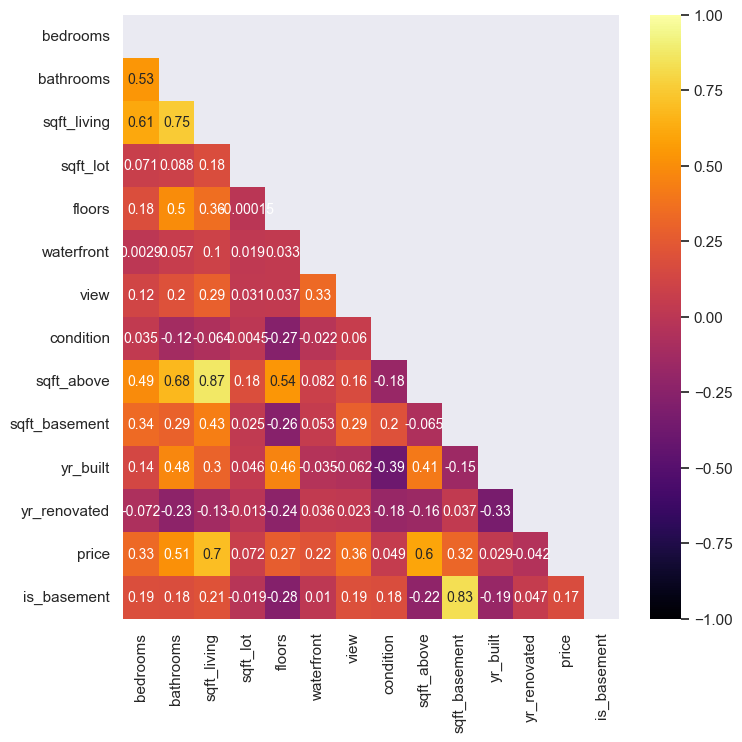

In [56]:
#check correlation
#mask --> agar yang muncul adalah segitiga correlation matrix
#vmin=skala minimum, vmax= skala maksimum

plt.figure(figsize=(8,8),dpi=100)
mask = np.triu(np.ones_like(x_train.corr(),dtype=np.bool))
sns.heatmap(x_train.corr(),mask=mask,vmin=-1,vmax=1,annot=True,cmap='inferno',fmt='.2g')

In [57]:
#membuat data set untuk machine learning
x_train_linear = x_train.copy()
x_test_linear = x_test.copy()

In [58]:
#membuang kolom yang korelasinya kecil
#sold_date --> karna terjual ditahun yang sama  dan yr_built memiliki korelasi kecil

x_train_linear = x_train_linear.drop(['sqft_lot','condition','yr_built','sqft_above','is_basement','sold_date','yr_renovated'],axis=1)

## 5.2 Data Test

In [59]:
x_test_linear.head()

,sold_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3683,2014-06-30,3,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0
4411,2014-05-22,5,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0
2584,2014-06-16,3,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000
69,2014-05-04,3,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0
1844,2014-06-04,3,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009


In [60]:
#menyamakan feature x_test_linear dengan x_train_linear dengan cara drop/tambah feature


x_test_linear = x_test_linear.drop(['sqft_lot','condition','yr_built','sqft_above','sold_date','yr_renovated'],axis=1)
x_test_linear

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
3683,3,2.50,1460,2.0,0,0,280
4411,5,2.25,2000,1.0,0,0,700
2584,3,3.25,2940,3.0,0,3,500
69,3,2.50,2200,1.0,0,0,630
1844,3,2.50,1720,1.0,0,0,720
...,...,...,...,...,...,...,...
3437,6,3.50,3600,2.0,0,0,860
3340,4,2.50,3920,2.0,0,0,0
1289,3,2.00,1490,1.5,0,0,0
449,3,1.75,1780,1.0,0,0,0


# 6. Transformasi Target dan Predictor

## 6.1 Transformasi Target - Train

Text(0.5, 1.0, 'Distribusi Harga Sebelum Transformasi')

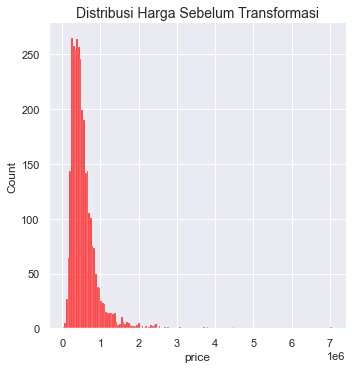

In [61]:
#syarat model regresi linear :
#berdistribusi normal
#harus ada scaling 

#displot target sebelum transformasi
sns.displot(x_train_linear['price'],color='red')
plt.title('Distribusi Harga Sebelum Transformasi',fontsize=14)



Text(0.5, 1.0, 'Distribusi Harga Setelah Transformasi')

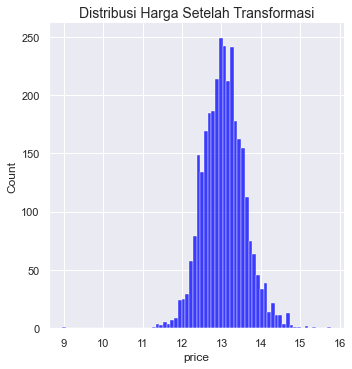

In [62]:
#transformasi distribusi harga menggunakan np.log1p = log10 (logaritma)
x_train_linear['price'] = np.log1p(x_train_linear['price'])

#membuat displot harga yang sudah ditransformasi
sns.displot((x_train_linear['price']),color='blue')
plt.title('Distribusi Harga Setelah Transformasi',fontsize=14)

Target atau harga sudah memiliki distribusi normal

In [63]:
#membuat y_train dari x_train_linear yang sudah ditransformasi

y_train=x_train_linear['price'] 

#lalu drop price dari x_train_linear 
x_train_linear = x_train_linear.drop('price',axis=1)

In [64]:
x_train_linear.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
2194,6,1.50,1930,1.0,0,0,900
958,2,2.25,1230,2.0,0,0,270
1533,3,1.50,1470,1.0,0,0,0
654,4,2.50,2700,2.0,0,0,0
1497,2,1.00,740,1.0,0,0,0


## 6.2 Transformasi Predictor - Train

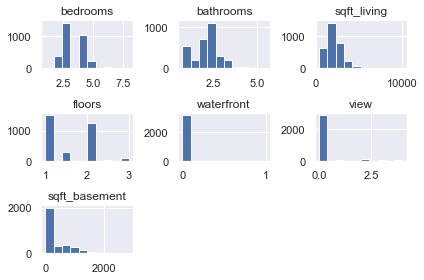

In [65]:
#cek histogram semua predictor
x_train_linear.hist()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribusi Luas Bangunan Sebelum Transformasi')

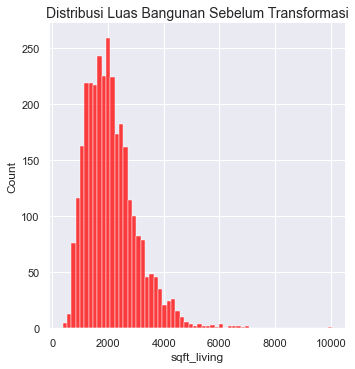

In [66]:
#transformasi prediktor yang memiliki tipe data kontinue dan tidak berdistribusi normal --> sqft_living

#historgam sqft_living sebelum transformasi
sns.displot(x_train_linear['sqft_living'],color='red')
plt.title('Distribusi Luas Bangunan Sebelum Transformasi',fontsize=14)

In [67]:
#transformasi distribusi harga menggunakan np.sqrt (akar)
x_train_linear['sqft_living'] = np.sqrt(x_train_linear['sqft_living'])

Text(0.5, 1.0, 'Distribusi Luas Bangunan Setelah Transformasi')

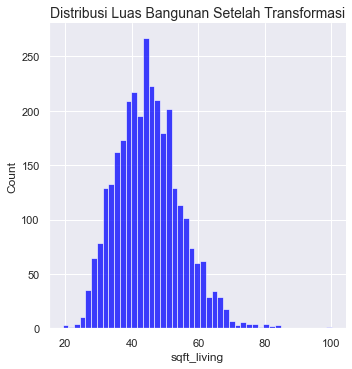

In [68]:
sns.displot((x_train_linear['sqft_living']),color='blue')
plt.title('Distribusi Luas Bangunan Setelah Transformasi',fontsize=14)

## 6.3 Transformasi Target dan Predictor - Test

In [69]:
x_test_linear['price']=y_test

#filter dan transformasi price
x_test_linear = x_test_linear[x_test_linear['price']>0]
x_test_linear['price'] = np.log1p(x_test_linear['price'])

#filter bathrooms <6 (seperti data train)
x_test_linear = x_test_linear[x_test_linear['bathrooms']<6]

#filter bedroom <9 (seperti data train)
x_test_linear = x_test_linear[(x_test_linear['bedrooms']>0) & (x_test_linear['bedrooms']<9)]

#transformasi sqft_living
x_test_linear['sqft_living'] = np.sqrt(x_test_linear['sqft_living'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11236\105199924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_linear['price'] = np.log1p(x_test_linear['price'])


In [70]:
#membuat y_test dari x_test_linear yang sudah difilter
y_test=x_test_linear['price']

#lalu drop 'price' dari x_test_linear
x_test_linear = x_test_linear.drop(['price'],axis=1)

In [71]:
x_train_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 2194 to 860
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3180 non-null   int64  
 1   bathrooms      3180 non-null   float64
 2   sqft_living    3180 non-null   float64
 3   floors         3180 non-null   float64
 4   waterfront     3180 non-null   int64  
 5   view           3180 non-null   int64  
 6   sqft_basement  3180 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 198.8 KB


In [72]:
x_test_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 3683 to 3774
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1364 non-null   int64  
 1   bathrooms      1364 non-null   float64
 2   sqft_living    1364 non-null   float64
 3   floors         1364 non-null   float64
 4   waterfront     1364 non-null   int64  
 5   view           1364 non-null   int64  
 6   sqft_basement  1364 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 85.2 KB


#### Summary Data - 6

x_train_linear dan x_test_linear memiliki jumlah feature/kolom yang sama, yaitu 7 kolom.
jumlah baris x_train_linear 3180 (70% dari data frame)
jumlah baris x_test_linear 1364 (30% dari data frame)

# 7. Feature Scalling

In [73]:
#membuat data dr tiap feature memiliki skala yg sama
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## 7.1 Data Train

In [74]:
#data x_train_linear sebelum discalling
x_train_linear.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
2194,6,1.50,43.931765,1.0,0,0,900
958,2,2.25,35.071356,2.0,0,0,270
1533,3,1.50,38.340579,1.0,0,0,0
654,4,2.50,51.961524,2.0,0,0,0
1497,2,1.00,27.202941,1.0,0,0,0


In [75]:
#membuat variabel columns
columns = x_train_linear.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_basement'],
      dtype='object')

In [76]:
#process scalling --> mempelajari (fit) kolom/feature yang didefinisikan dalam variabel coloumns 
x_train_linear[columns] = scaler.fit_transform(x_train_linear[columns])

In [77]:
#data x_train_linear sesudah discalling
x_train_linear.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
2194,2.916451,-0.845825,-0.117575,-0.948735,-0.077529,-0.303609,1.281200
958,-1.548257,0.142196,-1.036299,0.922839,-0.077529,-0.303609,-0.098336
1533,-0.432080,-0.845825,-0.697318,-0.948735,-0.077529,-0.303609,-0.689566
654,0.684097,0.471537,0.715020,0.922839,-0.077529,-0.303609,-0.689566
1497,-1.548257,-1.504506,-1.852165,-0.948735,-0.077529,-0.303609,-0.689566


setelah proses feature scalling, data train memiliki range skala yang sama

## 7.2 Data Test

In [78]:
#x_test_linear sebelum proses scalling
x_test_linear.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
3683,3,2.50,38.209946,2.0,0,0,280
2584,3,3.25,54.221767,3.0,0,3,500
69,3,2.50,46.904158,1.0,0,0,630
1844,3,2.50,41.472883,1.0,0,0,720
33,4,2.50,53.103672,2.0,0,0,0


In [79]:
#process scalling --> mempelajari (fit) kolom/feature  yang didefinisikan dalam variabel coloumns 
x_test_linear[columns] = scaler.fit_transform(x_test_linear[columns])

In [80]:
#x_test_linear setelah process scalling
x_test_linear.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
3683,-0.454092,0.426312,-0.726446,0.881635,-0.085939,-0.309884,-0.023982
2584,-0.454092,1.403606,0.958017,2.720398,-0.085939,3.615952,0.474433
69,-0.454092,0.426312,0.188195,-0.957127,-0.085939,-0.309884,0.768950
1844,-0.454092,0.426312,-0.383181,-0.957127,-0.085939,-0.309884,0.972847
33,0.661911,0.426312,0.840392,0.881635,-0.085939,-0.309884,-0.658329


setelah proses feature scalling, data memiliki range skala yang sama

# 8. Model & Prediksi Target

Pada case kali ini, kita akan menggunakan machine learning statsmodel OLS karna target adalah data kontinue dan sudah ditransformasi menjadi distribusi normal

In [81]:
#Statsmodel

import statsmodels
import statsmodels.api as sm

## 8.1 Fitting Data Train

In [82]:
#mencari intercepts/konstanta (y = mx+c)
konstanta = sm.add_constant(x_train_linear)

In [83]:
#Modelling dengan statsmodels
simplemodel = sm.OLS(y_train,konstanta)
results = simplemodel.fit()

In [84]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     475.5
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:12:46   Log-Likelihood:                -1394.7
No. Observations:                3180   AIC:                             2805.
Df Residuals:                    3172   BIC:                             2854.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0638      0.007   1961.102

In [85]:
print('coefficient of determination:', results.rsquared)
print('regression coefficients:', results.params)

coefficient of determination: 0.5120370936802563
regression coefficients: const            13.063836
bedrooms         -0.058571
bathrooms         0.025374
sqft_living       0.340612
floors            0.051876
waterfront        0.017566
view              0.066148
sqft_basement     0.022382
dtype: float64


In [86]:
np.exp(13.063836)

471576.20949054434

Dari fitting data train dengan statsmodel regresi, diketahui bahwa :
1. Model mampu menjelaskan data sebesar 51% (coefficient of determination/r-square)
2. Harga rumah tanpa memperhatikan feature (bobot feature 0) adalah 471.576,21 dollar (np.exp(regression coefficients)
3. Semua feature berpengaruh terhadap harga, hal ini didukung dengan nilai p>|t| lebih kecil dari 0.05
4. Bobot bedrooms memiliki nilai negatif, hal ini berarti setiap satu kenaikan jumlah dari bedrooms akan menurunkan harga rumah (dengan asumsi semua feature kecuali bedrooms bernilai 0)
5. Bobot selain bedrooms bernilai positif, hal ini berarti setiap satu kenaikan jumlah dari feature tersebut akan menaikan harga rumah (dengan asumsi hanya feature terkait yang memiliki nilai)

## 8.2 Fitting Data Test

In [87]:
#mencari intercepts/konstanta (y=mx+c)
konstanta_1 = sm.add_constant(x_test_linear)

In [88]:
#Modelling dengan statsmodels
simplemodel = sm.OLS(y_test,konstanta_1)
results = simplemodel.fit()

In [89]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 24 Aug 2022   Prob (F-statistic):          1.63e-161
Time:                        12:12:46   Log-Likelihood:                -726.76
No. Observations:                1364   AIC:                             1470.
Df Residuals:                    1356   BIC:                             1511.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0608      0.011   1166.636

Dari fitting data test dengan statsmodel, dapat diketahui bahwa :

1. Data test masuk kategori good fit dengan data train, dimana perbedaannya tidak sampai 10%.
2. Kemampuan model dalam menjelaskan data adalah 43% 

## 8.3 Prediksi Target

In [90]:
#membuat data frame baru yang berisi harga prediksi

# membuat list kosong dengan kolom data x_train_linear
list_columns = x_train_linear.columns

#membuat prediksi model
prediction_1 = results.predict(konstanta_1)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(x_test_linear)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement,actual_price,prediction_price
3683,-0.454092,0.426312,-0.726446,0.881635,-0.085939,-0.309884,-0.023982,13.206706,12.893421
2584,-0.454092,1.403606,0.958017,2.720398,-0.085939,3.615952,0.474433,14.353465,13.762020
69,-0.454092,0.426312,0.188195,-0.957127,-0.085939,-0.309884,0.768950,12.807655,13.125053
1844,-0.454092,0.426312,-0.383181,-0.957127,-0.085939,-0.309884,0.972847,12.524530,12.961968
33,0.661911,0.426312,0.840392,0.881635,-0.085939,-0.309884,-0.658329,13.345509,13.286608


# 9. Evaluasi Kelayakan Model

Statsmodels layak digunakan apabila memenuhi 2 asumsi : <br/>
    1. Distribusi residual antara aktual dan prediksi memiliki distribusi normal <br/>
       Hal ini diduji dengan Uji Residual <br/>
    2. Distribusi residual dengan prediksi memiliki distribusi acak <br/>
       Hal ini diuji dengan Uji Homoskedasitas <br/>

## 9.1 Uji Residual

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


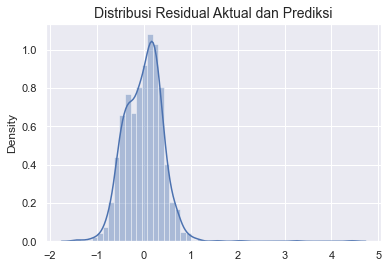

In [91]:
#melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1)
plt.title('Distribusi Residual Aktual dan Prediksi',fontsize=14)
plt.show()

In [92]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement,actual_price,prediction_price,residual
3683,-0.454092,0.426312,-0.726446,0.881635,-0.085939,-0.309884,-0.023982,13.206706,12.893421,0.313285
2584,-0.454092,1.403606,0.958017,2.720398,-0.085939,3.615952,0.474433,14.353465,13.762020,0.591446
69,-0.454092,0.426312,0.188195,-0.957127,-0.085939,-0.309884,0.768950,12.807655,13.125053,-0.317398
1844,-0.454092,0.426312,-0.383181,-0.957127,-0.085939,-0.309884,0.972847,12.524530,12.961968,-0.437438
33,0.661911,0.426312,0.840392,0.881635,-0.085939,-0.309884,-0.658329,13.345509,13.286608,0.058901


Dari grafik dapat disimpulkan bahwa residual antara aktual harga dan prediksi harga memiliki distribusi normal. 1 asumsi sudah terpenuhi

## 9.2 Uji Homoskedastisitas

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residuals vs Prediction')

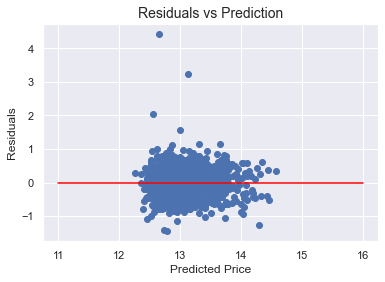

In [93]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

#membuat line plot hubungan residual vs prediction
asm_homosk=sns.lineplot([11,16],[0,0],color='red')
plt.title('Residuals vs Prediction',fontsize=14)

Dari grafik dapat disimpulkan bahwa residual antara prediksi harga berdistribusi acak. 2 asumsi sudah terpenuhi

## 9.3 Kesimpulan

1. Model mampu menjelaskan data test sebesar 43%
2. Berdasarkan uji statistik, dimana nilai p>|t| kurang dari 0.05, maka dapat dikatakan bahwa feature yang sudah memiliki pengaruh yang signifikan terhadap harga rumah
3. Model layak digunakan karna sudah memenuhi asumsi distribusi normal uji residual dan distribusi acak uji homoskedastisitas
4. Perlu menambah feature baru untuk meningkatkan kemampuan model dalam menjelaskan data